In [44]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fetch dataset 
zoo = fetch_ucirepo(id=111) 
  
# data (as pandas dataframes) 
X = zoo.data.features 
y = zoo.data.targets 

In [45]:
# metadata
print(zoo.metadata) 

# variable information 
print(zoo.variables) 

{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

In [46]:
print("Analise do dataset:")
print(X.describe().transpose())

Analise do dataset:
          count      mean       std  min  25%  50%  75%  max
hair      101.0  0.425743  0.496921  0.0  0.0  0.0  1.0  1.0
feathers  101.0  0.198020  0.400495  0.0  0.0  0.0  0.0  1.0
eggs      101.0  0.584158  0.495325  0.0  0.0  1.0  1.0  1.0
milk      101.0  0.405941  0.493522  0.0  0.0  0.0  1.0  1.0
airborne  101.0  0.237624  0.427750  0.0  0.0  0.0  0.0  1.0
aquatic   101.0  0.356436  0.481335  0.0  0.0  0.0  1.0  1.0
predator  101.0  0.554455  0.499505  0.0  0.0  1.0  1.0  1.0
toothed   101.0  0.603960  0.491512  0.0  0.0  1.0  1.0  1.0
backbone  101.0  0.821782  0.384605  0.0  1.0  1.0  1.0  1.0
breathes  101.0  0.792079  0.407844  0.0  1.0  1.0  1.0  1.0
venomous  101.0  0.079208  0.271410  0.0  0.0  0.0  0.0  1.0
fins      101.0  0.168317  0.376013  0.0  0.0  0.0  0.0  1.0
legs      101.0  2.841584  2.033385  0.0  2.0  4.0  4.0  8.0
tail      101.0  0.742574  0.439397  0.0  0.0  1.0  1.0  1.0
domestic  101.0  0.128713  0.336552  0.0  0.0  0.0  0.0  1.0
cats

Histograma de cada atributo usando matplot:


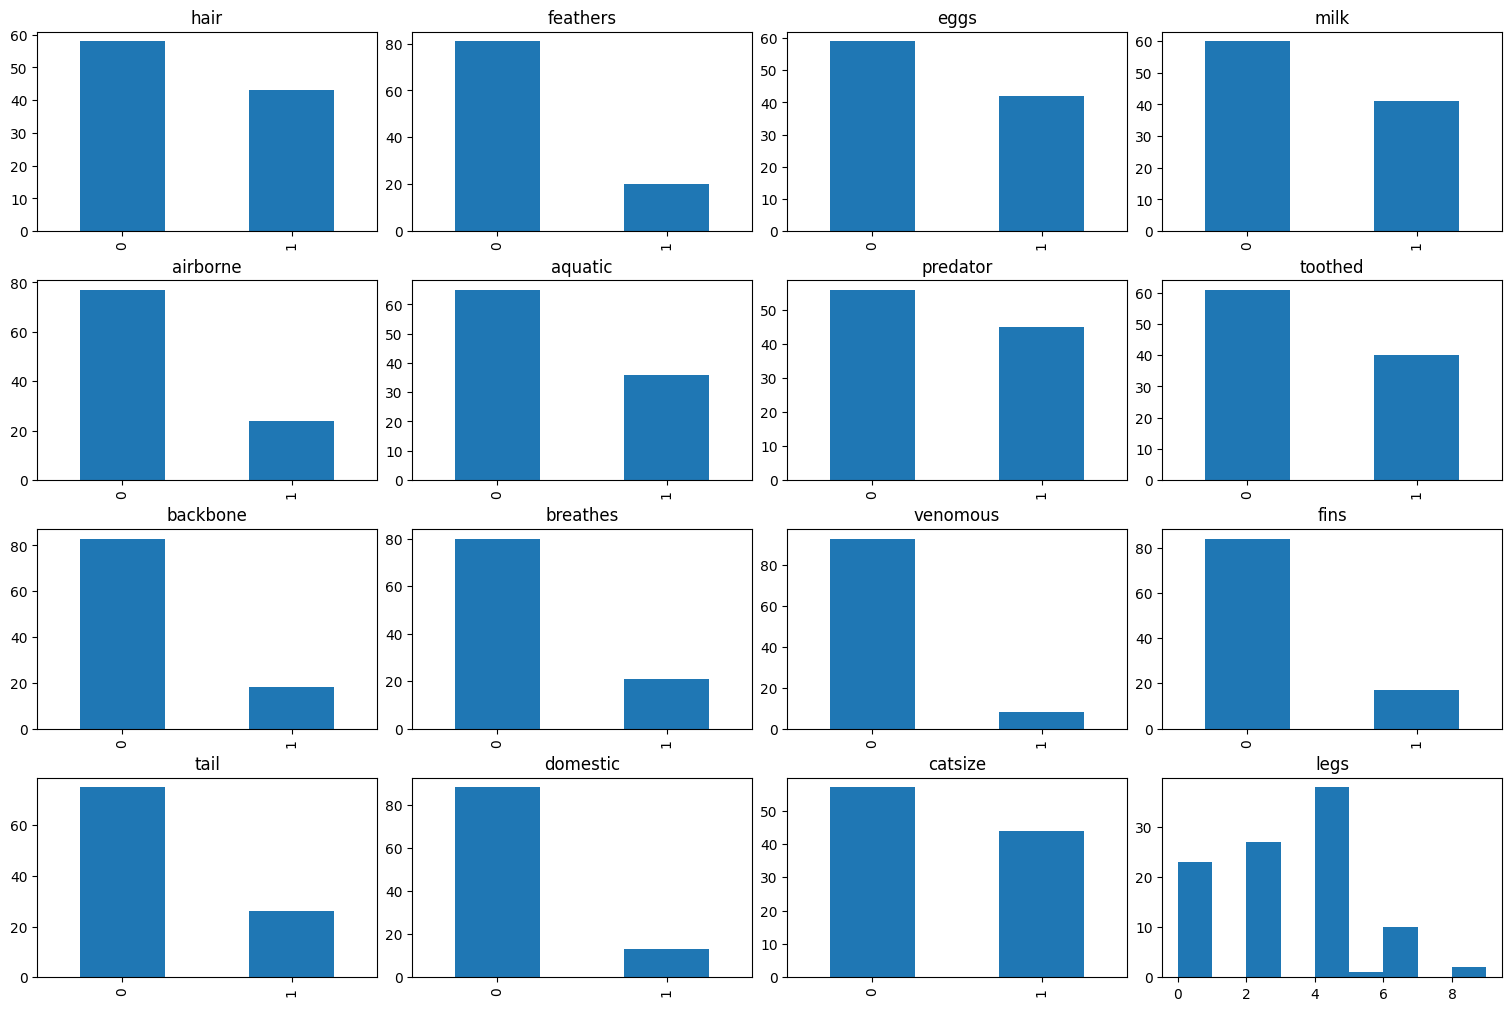

In [54]:
print("Histograma de cada atributo usando matplot:")

# Identificar colunas binárias e a coluna 'legs'
binary_columns = X.columns[X.nunique() == 2]
legs_column = 'legs'

# Definir o número de linhas e colunas para os subplots
nrows = 4
ncols = 4

# Criar uma figura e eixos com um tamanho máximo de largura
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotar histogramas binários como gráficos de barras
for i, col in enumerate(binary_columns):
    X[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['0', '1'])
    axes[i].set_xlabel('')

# Plotar o histograma do atributo 'legs'
X[legs_column].hist(ax=axes[len(binary_columns)], bins=range(int(X[legs_column].min()), int(X[legs_column].max()) + 2))
axes[len(binary_columns)].set_title(legs_column)
axes[len(binary_columns)].grid(False)

# Remover eixos não utilizados
for j in range(len(binary_columns) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [ ]:
print("Histograma de cada atributo usando matplot:")

# Identificar colunas binárias e a coluna 'legs'
binary_columns = X.columns[X.nunique() == 2]
legs_column = 'legs'

# Definir o número de linhas e colunas para os subplots
nrows = 4
ncols = 4

# Criar uma figura e eixos com um tamanho máximo de largura
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotar histogramas binários como gráficos de barras
for i, col in enumerate(binary_columns):
    X[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['0', '1'])
    axes[i].set_xlabel('')  # Remover título do eixo x
    axes[i].set_ylabel('')  # Remover título do eixo y

# Plotar o histograma do atributo 'legs'
X[legs_column].hist(ax=axes[len(binary_columns)], bins=range(int(X[legs_column].min()), int(X[legs_column].max()) + 2))
axes[len(binary_columns)].set_title(legs_column)
axes[len(binary_columns)].set_xlabel('')  # Remover título do eixo x
axes[len(binary_columns)].set_ylabel('')  # Remover título do eixo y

# Remover eixos não utilizados
for j in range(len(binary_columns) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()